#  IMPORT LIBRARIES AND PERFORM PARQUET TECHNIQUE FOR LOADING GITHUB DATASET OF APPROX. 3GB

In [1]:
import pandas as pd
import ijson
import glob

file_path = "C:\\Users\\123\\Desktop\\BDA\\repo_metadata.json"
parquet_file_base = "C:\\Users\\123\\Desktop\\BDA\\repo_metadata"

rows = []
batch_size = 100000
i = 0

with open(file_path, 'r', encoding='utf-8') as f:
    objects = ijson.items(f, "item")  # stream items from JSON
    for obj in objects:
        rows.append(obj)
        if len(rows) >= batch_size:
            df = pd.DataFrame(rows)
            df.to_parquet(f"{parquet_file_base}_{i}.parquet", engine="fastparquet", compression="snappy", index=False)
            print(f"Chunk {i} saved.")
            rows = []
            i += 1

# Save remaining rows
if rows:
    df = pd.DataFrame(rows)
    df.to_parquet(f"{parquet_file_base}_{i}.parquet", engine="fastparquet", compression="snappy", index=False)
    print(f"Chunk {i} saved.")

# Merge chunks into a single Parquet
parquet_files = glob.glob(f"{parquet_file_base}_*.parquet")
df_list = [pd.read_parquet(pf, engine="fastparquet") for pf in parquet_files]
final_df = pd.concat(df_list, ignore_index=True)
final_df.to_parquet(f"{parquet_file_base}.parquet", engine="fastparquet", compression="snappy", index=False)

print("✅ All chunks merged into final Parquet file.")


Chunk 0 saved.
Chunk 1 saved.
Chunk 2 saved.
Chunk 3 saved.
Chunk 4 saved.
Chunk 5 saved.
Chunk 6 saved.
Chunk 7 saved.
Chunk 8 saved.
Chunk 9 saved.
Chunk 10 saved.
Chunk 11 saved.
Chunk 12 saved.
Chunk 13 saved.
Chunk 14 saved.
Chunk 15 saved.
Chunk 16 saved.
Chunk 17 saved.
Chunk 18 saved.
Chunk 19 saved.
Chunk 20 saved.
Chunk 21 saved.
Chunk 22 saved.
Chunk 23 saved.
Chunk 24 saved.
Chunk 25 saved.
Chunk 26 saved.
Chunk 27 saved.
Chunk 28 saved.
Chunk 29 saved.
Chunk 30 saved.
Chunk 31 saved.
Chunk 32 saved.
Chunk 33 saved.
Chunk 34 saved.
Chunk 35 saved.
Chunk 36 saved.
Chunk 37 saved.
Chunk 38 saved.
Chunk 39 saved.
✅ All chunks merged into final Parquet file.


# INSPECT DATA QUALITY

In [6]:
import pandas as pd
import ast

# --- Clean & Prepare ---
# Convert languages/topics from string to list/dict if needed
df['languages'] = df['languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Rows × Columns
print("📊 Rows And Columns:\n", df.shape, "\n")  

# Column names
print("🧩 Column Names:\n", df.columns.tolist(), "\n")

# First few rows
print("🔍 First few rows:\n", df.head(), "\n")  

# Get summary of all columns
print("ℹ️ Data Summary:")
df.info()
print("\n")

# Check missing values count per column
print("❌ Missing values count per column:\n", df.isnull().sum(), "\n")

# Check percentage of missing values
print("📉 % of missing values:\n", (df.isnull().sum() / len(df)) * 100, "\n")

# Detect duplicates safely (convert unhashable objects to strings)
df_for_dup = df.copy()
df_for_dup['languages'] = df_for_dup['languages'].astype(str)
df_for_dup['topics'] = df_for_dup['topics'].astype(str)
print("📑 Duplicates:\n", df_for_dup.duplicated().sum(), "\n")

# Basic statistics for numeric columns
print("📈 Statistics for numeric columns:\n", df.describe(), "\n")

# View unique value counts for categorical columns safely
df_for_unique = df.copy()
df_for_unique['languages'] = df_for_unique['languages'].astype(str)
df_for_unique['topics'] = df_for_unique['topics'].astype(str)

print("🧮 Unique value counts for categorical columns:\n", df_for_unique.nunique(), "\n")

📊 Rows And Columns:
 (85968, 25) 

🧩 Column Names:
 ['owner', 'name', 'stars', 'forks', 'watchers', 'isFork', 'isArchived', 'languages', 'languageCount', 'topics', 'topicCount', 'diskUsageKb', 'pullRequests', 'issues', 'description', 'primaryLanguage', 'createdAt', 'pushedAt', 'defaultBranchCommitCount', 'license', 'assignableUserCount', 'codeOfConduct', 'forkingAllowed', 'nameWithOwner', 'parent'] 

🔍 First few rows:
        owner                      name  stars  forks  watchers  isFork  \
0     tomiok     shopping-cart-service      5      0         3   False   
1   zhugesdk       zhugeio-sdk-android      5      1         1   False   
2    ruchtem                   moo-mtl      5      4         1   False   
3  tranleanh       vector-quantization      5      1         3   False   
4    keuller  tutorial-ranking-service      5      0         1   False   

   isArchived                                          languages  \
0       False  [{'name': 'Go', 'size': 3265}, {'name': 'Docke...

# HANDLE MISSING VALUES

In [11]:
import pandas as pd
import ast

# STEP 1: Convert JSON strings to lists/dicts if needed
# Convert 'languages' and 'topics' from string to actual list/dict
df['languages'] = df['languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# STEP 2: Drop columns with very high missing values or not useful
# errors='ignore' ensures no KeyError if column is missing
df.drop(columns=['codeOfConduct', 'parent'], errors='ignore', inplace=True)

# STEP 3: Fill missing categorical values
df['primaryLanguage'] = df['primaryLanguage'].fillna('Unknown')
df['description'] = df['description'].fillna('No Description')
df['license'] = df['license'].fillna('No License')

# STEP 4: Fill missing numeric values
df['defaultBranchCommitCount'] = df['defaultBranchCommitCount'].fillna(0)

# STEP 5: Check missing values after filling
print("Missing values per column after preprocessing:\n")
print(df.isnull().sum())

# STEP 6:  Remove duplicates
# Convert unhashable columns to strings to safely detect duplicates
df_dup_check = df.copy()
df_dup_check['languages'] = df_dup_check['languages'].astype(str)
df_dup_check['topics'] = df_dup_check['topics'].astype(str)
print("\nNumber of duplicate rows:", df_dup_check.duplicated().sum())


Missing values per column after preprocessing:

owner                       0
name                        0
stars                       0
forks                       0
watchers                    0
isFork                      0
isArchived                  0
languages                   0
languageCount               0
topics                      0
topicCount                  0
diskUsageKb                 0
pullRequests                0
issues                      0
description                 0
primaryLanguage             0
createdAt                   0
pushedAt                    0
defaultBranchCommitCount    0
license                     0
assignableUserCount         0
forkingAllowed              0
nameWithOwner               0
dtype: int64

Number of duplicate rows: 0


# DESCRIPTIVE ANALYSIS

# STAR DISTRIBUTION

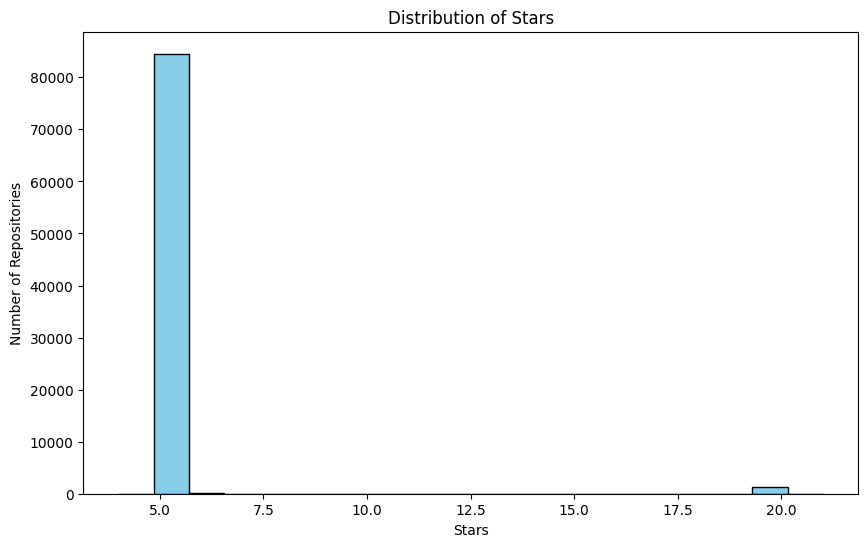

In [14]:
# Step 1: Histogram of Stars How many repositories have 0, 1, 2… up to max stars.
#Helps identify whether most projects are low-starred or high-starred.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['stars'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Stars")
plt.xlabel("Stars")
plt.ylabel("Number of Repositories")
plt.show()


# FORKS DISTRIBUTION

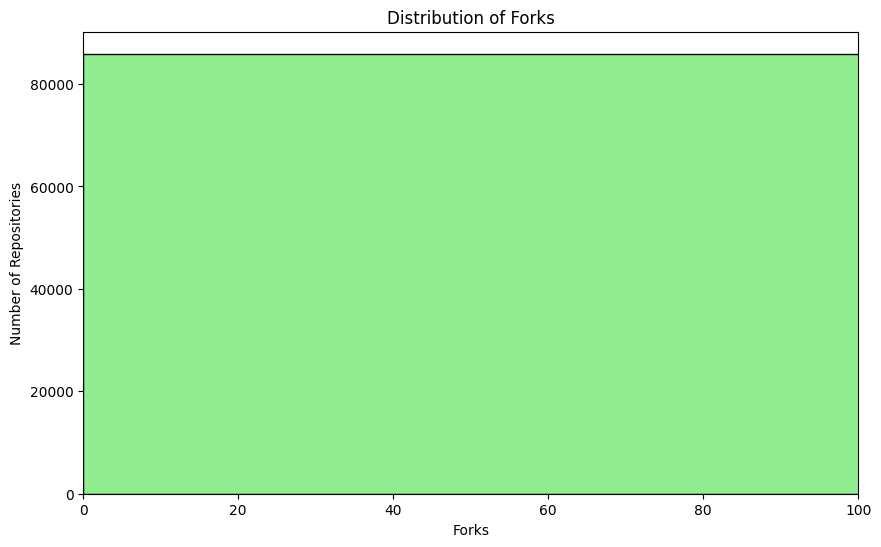

In [21]:
# Step 2: Histogram of Forks. Forks can be heavily skewed (some projects like Linux have thousands of forks).
#We use xlim(0,100) to focus on the majority of repositories, avoiding extreme outliers.

plt.figure(figsize=(10,6))
plt.hist(df['forks'], bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribution of Forks")
plt.xlabel("Forks")
plt.ylabel("Number of Repositories")
plt.xlim(0, 100)
plt.show()


# WATCHERS ANALYSIS

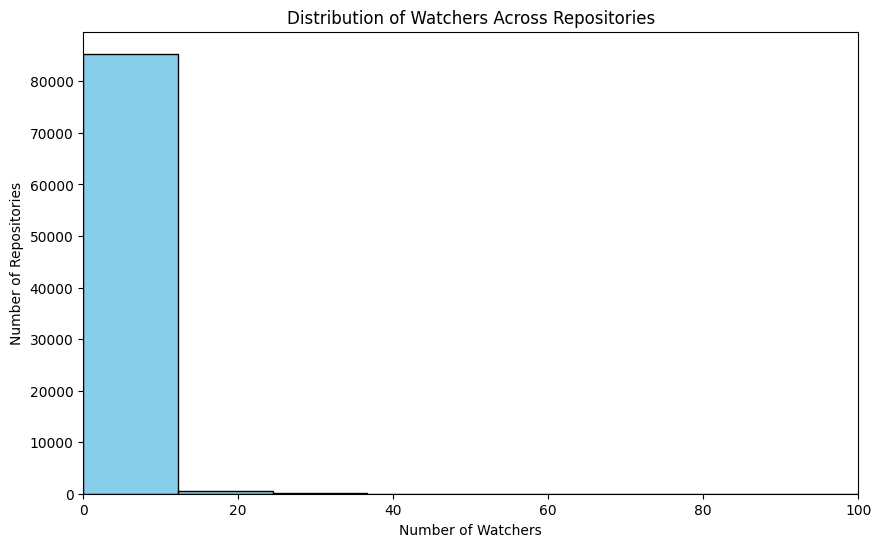

In [25]:
#community interest per repository.
plt.figure(figsize=(10,6))
plt.hist(df['watchers'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Watchers Across Repositories")
plt.xlabel("Number of Watchers")
plt.ylabel("Number of Repositories")
plt.xlim(0, 100)
plt.show()

# PRIMARY LANGUAGE ANALYSIS

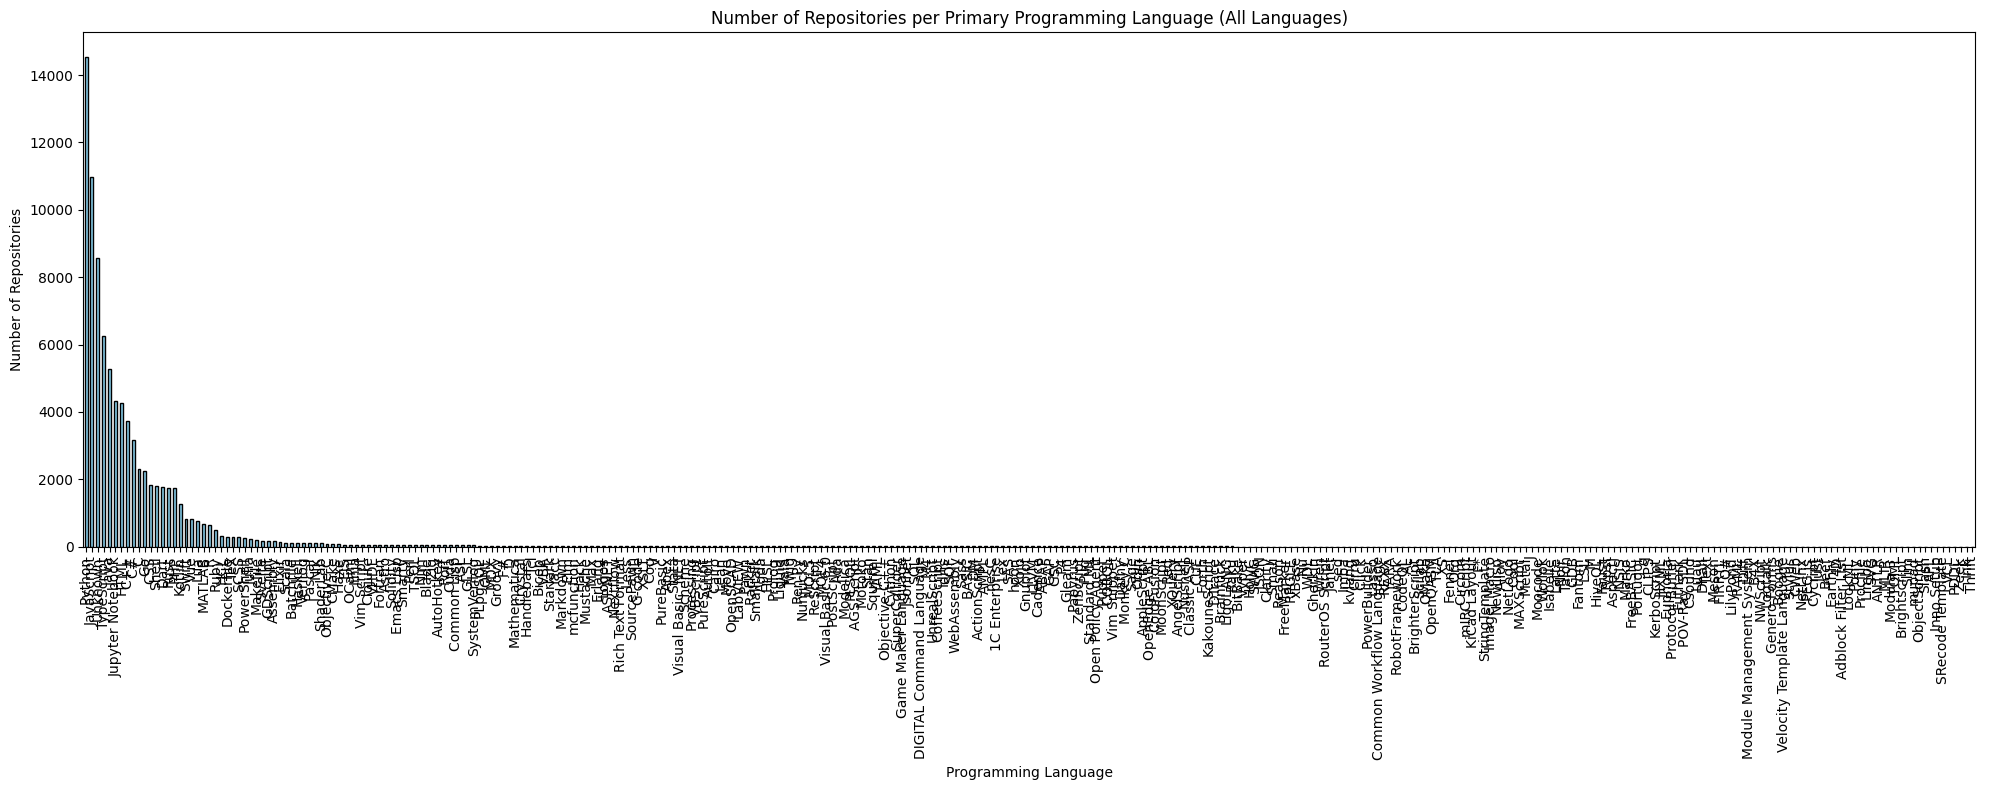

In [30]:
# Count repositories per primary language (all)
language_counts_all = df['primaryLanguage'].value_counts()

plt.figure(figsize=(20,8))
language_counts_all.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Repositories per Primary Programming Language (All Languages)")
plt.xlabel("Programming Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=90)  # rotate labels for readability
plt.tight_layout()
plt.show()

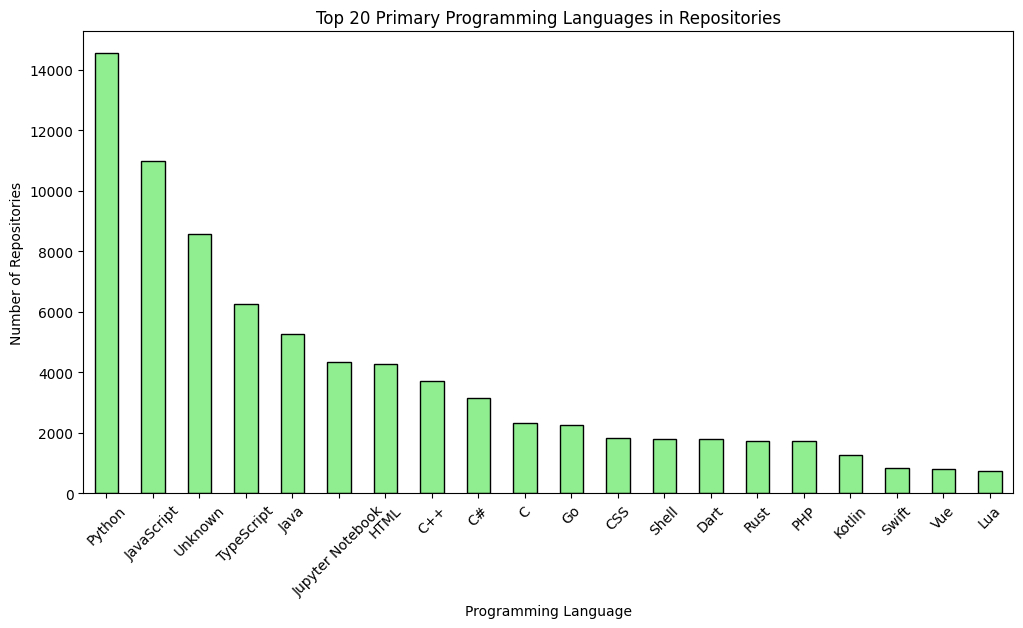

In [28]:
# Count repositories per primary language  # top 20 languages for clarity
language_counts = df['primaryLanguage'].value_counts().head(20) 

plt.figure(figsize=(12,6))
language_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 20 Primary Programming Languages in Repositories")
plt.xlabel("Programming Language")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.show()

# TOPICS ANALYSIS

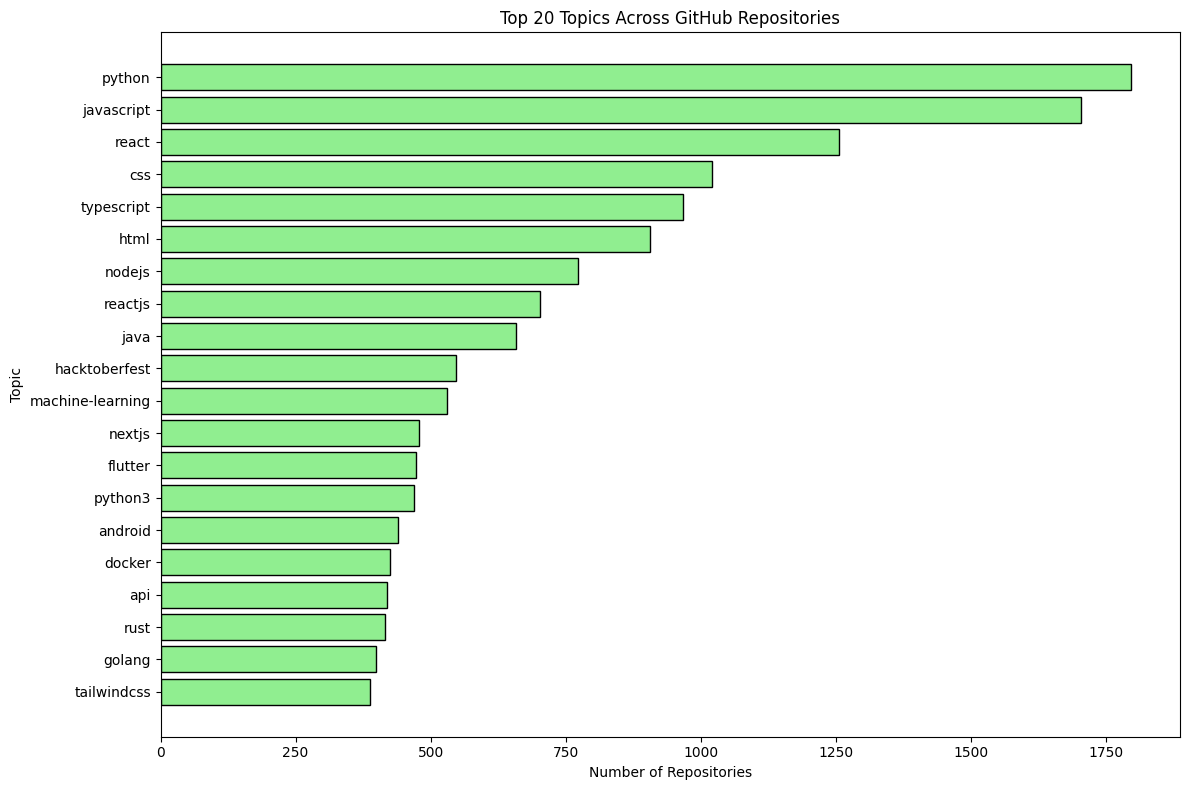

In [32]:
#which topics are most common across repositories
from collections import Counter
# Flatten the topics list
all_topics = [topic['name'] for sublist in df['topics'] for topic in sublist]
topic_counts = Counter(all_topics)

# Take top 20 topics
top_topics = dict(topic_counts.most_common(20))

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(list(top_topics.keys()), list(top_topics.values()), color='lightgreen', edgecolor='black')
plt.xlabel("Number of Repositories")
plt.ylabel("Topic")
plt.title("Top 20 Topics Across GitHub Repositories")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## ** TESTING HYPOTHESES **

## Hypothesis

## H₀ (Null Hypothesis): Repository popularity (stars) is independent of activity indicators (commits, forks, pull requests).

## H₁ (Alternative Hypothesis): Repository popularity is significantly influenced by activity indicators and maintenance level.

In [39]:
import pandas as pd
from scipy.stats import pearsonr

# Select relevant columns
activity_cols = ['forks', 'pullRequests', 'defaultBranchCommitCount']

print("=== Hypothesis Testing: Stars vs Activity Indicators ===\n")

for col in activity_cols:
    r, p = pearsonr(df['stars'], df[col])
    print(f"Stars vs {col}:")
    print(f"  Correlation coefficient (r) = {r:.3f}")
    print(f"  P-value = {p:.3f}")
    
    if p < 0.05:
        print("  Result: Statistically significant, but check effect size (r)\n")
    else:
        print("  Result: Not statistically significant → H0 cannot be rejected\n")


=== Hypothesis Testing: Stars vs Activity Indicators ===

Stars vs forks:
  Correlation coefficient (r) = -0.005
  P-value = 0.141
  Result: Not statistically significant → H0 cannot be rejected

Stars vs pullRequests:
  Correlation coefficient (r) = -0.018
  P-value = 0.000
  Result: Statistically significant, but check effect size (r)

Stars vs defaultBranchCommitCount:
  Correlation coefficient (r) = -0.004
  P-value = 0.278
  Result: Not statistically significant → H0 cannot be rejected



## If correlations are significant and positive, we reject H₀ (stars are influenced by activity indicators).

## If correlations are weak/insignificant, we fail to reject H₀.

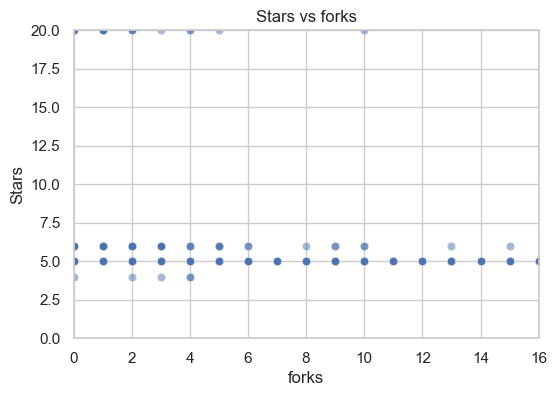

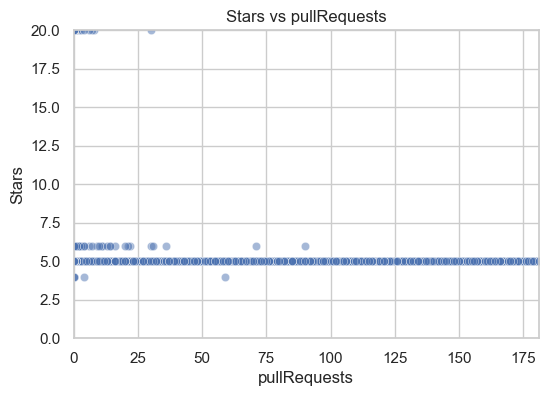

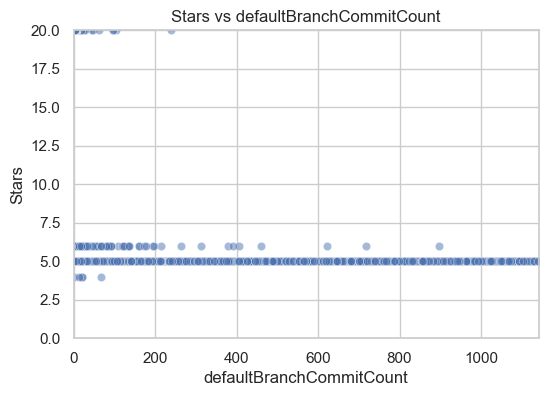

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style
sns.set(style="whitegrid")

# Columns to visualize
activity_cols = ['forks', 'pullRequests', 'defaultBranchCommitCount']

# Create scatter plots
for col in activity_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y='stars', alpha=0.5)
    plt.title(f"Stars vs {col}")
    plt.xlabel(col)
    plt.ylabel("Stars")
    plt.xlim(0, df[col].quantile(0.99))  # avoid extreme outliers
    plt.ylim(0, df['stars'].quantile(0.99))  # focus on main data
    plt.show()


## DuckDB

In [42]:
import duckdb

query = """
SELECT primaryLanguage, COUNT(*) as repo_count
FROM parquet_scan('C:/Users/123/Desktop/BDA/repo_metadata.parquet')
GROUP BY primaryLanguage
ORDER BY repo_count DESC
LIMIT 10
"""

result = duckdb.query(query).to_df()
print(result)


    primaryLanguage  repo_count
0            Python      678711
1        JavaScript      548240
2              None      331188
3              Java      248297
4               C++      205723
5        TypeScript      198939
6                 C      147475
7                C#      145459
8               PHP      135367
9  Jupyter Notebook      134383
